In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode

## getting dataset
df = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\Ravella_DS22_Strive_School_Excercises\02.Chapter\03. KNN\iphone_purchase_records.csv')
#print(df.head())
df = df.drop('Gender',axis=1)
#print(df)



In [32]:
X = df.drop('Purchase Iphone',axis=1)
y = df['Purchase Iphone']
print(X.iloc[0].values[0])

19


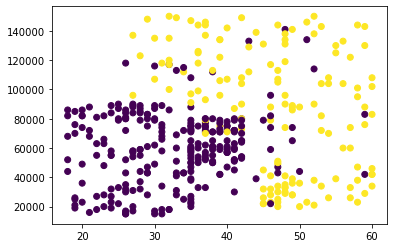

In [5]:
plt.scatter(X['Age'],X['Salary'], c= y)


In [13]:
# Eculidiean distance
def euclidean_distance(pt1,pt2):
    distance = np.linalg.norm(pt1-pt2)
    return distance
a = np.array([3,4])
b = np.array([5,9])
print(euclidean_distance(a,b))

5.385164807134504


In [42]:
def KNN(X_train, X_test, y_train, y_test, k_val):
    y_hat = []
    for q in range(len(X_test)):
        distances = []
        for i in range(len(X_train)):
            a = [(X_train.iloc[i].values[0]) ,(X_train.iloc[i].values[1])]
            b = [(X_test.iloc[q].values[0]), (X_test.iloc[q].values[1])]
            distances.append(euclidean_distance(np.array(a), np.array(b)))
        distances_df = pd.DataFrame(data= distances, columns=['distance'], index= y_train.index)
        K_neighbours_list = distances_df.sort_values(by=['distance'],axis=0)[:k_val]
        labels = y_train.loc[K_neighbours_list.index]
        voting = mode(labels).mode[0]
        y_hat.append(voting)
    return y_hat

In [43]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

a = KNN(X_train, X_test, y_train, y_test, k_val=5)

(array([0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

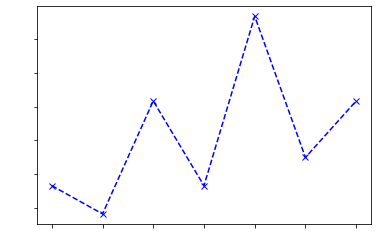

In [49]:
accuracy_values = []
for i in range(1,8):
    y_hat_test = KNN(X_train, X_test, y_train, y_test, k_val=i)
    accuracy_values.append(accuracy_score(y_test, y_hat_test))
plt.plot(range(1,8), accuracy_values, color="blue", marker="x", linestyle='dashed')
plt.xticks(color = "white")
plt.yticks(color = "white")